<font color='blue'><b>CECS 550 - PATTERN RECOGNITION<br>



**Fraudulent Firm : Regression & Classification**

<b><font color='purple'>Team Members: </b></font><br>
<b>Aishwarya Bhavsar (029371509)<br>
Madgula Adityanarayana Sarma (029339438)<br>
Justin Kieu(014151382)<br>
Janki Patel(029356143)<br>
Mudra Chaudhary(029475821)<br><b>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

In [ ]:
display(audit_risk.shape)
display(audit_risk.head())
display(trial.shape)
display(trial.head())

(776, 27)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


(776, 18)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


**Check The Missing Values**

We catched a missing value in "Money_Value" column.

Text(0.5, 1.18, 'Missing Values in Trial')

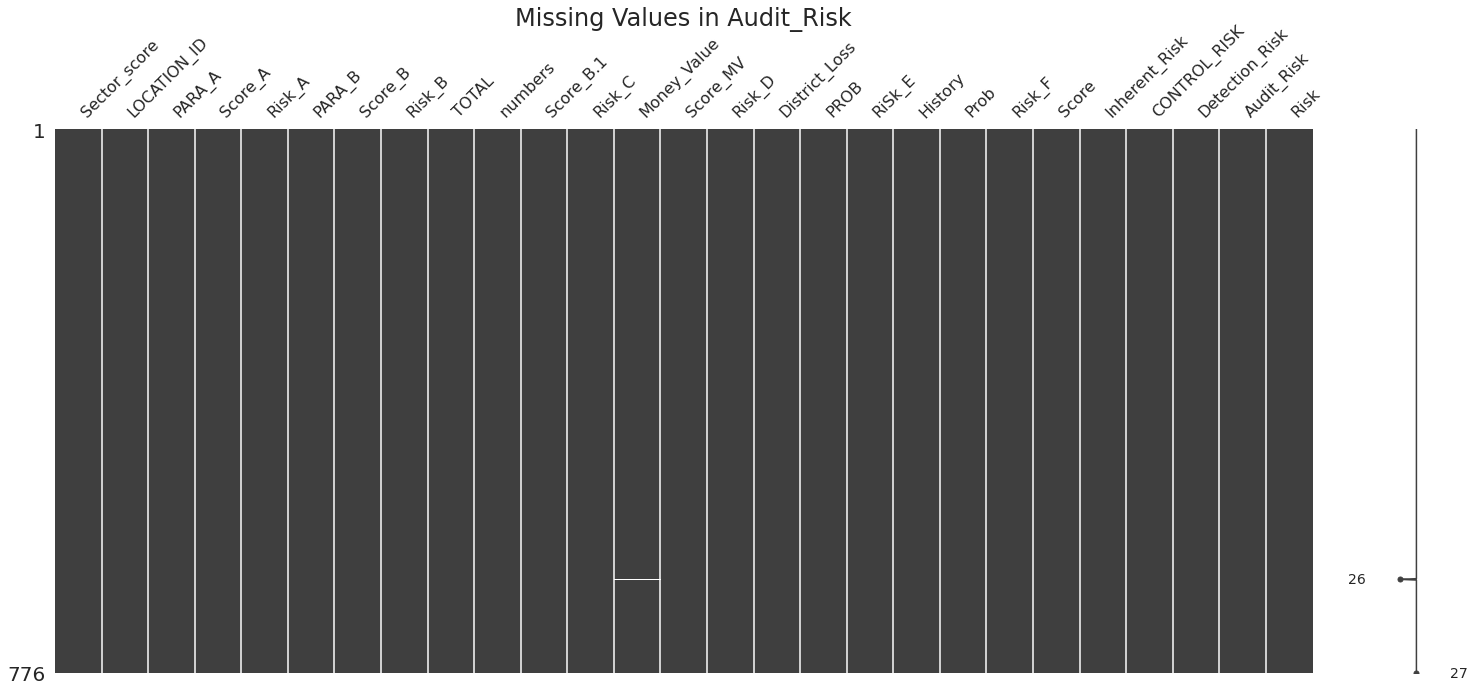

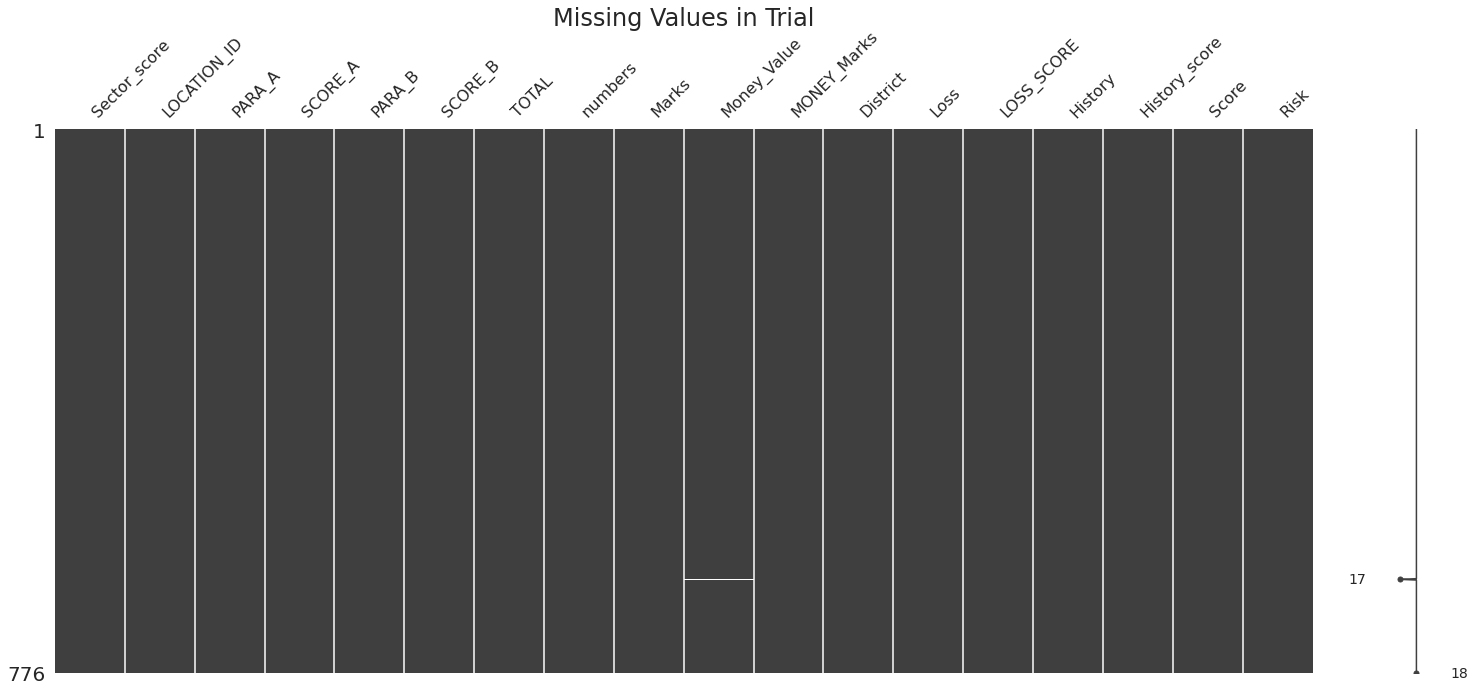

In [ ]:
import missingno as msno

msno.matrix(audit_risk)
plt.title("Missing Values in Audit_Risk",y=1.18, fontsize=24)
msno.matrix(trial)
plt.title("Missing Values in Trial",y=1.18, fontsize=24)

<b>Number of Unique values in each column</b><br>

As we have to merge two dataframes for regression and classification task so here we are looking for number of unique values in each column so we can merge dataframes using that common column.<br>

Clearly, there is no column which has a number of unique value equals to our number of records of the dataframe i.e. 776 hence we can not merge two dataframes just using single column and we have to think of combining multiple columns while merging the dataframes.

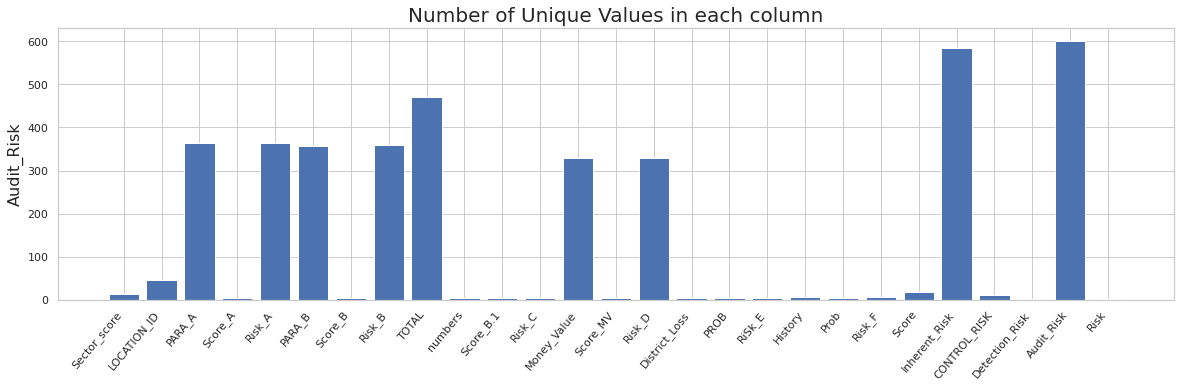

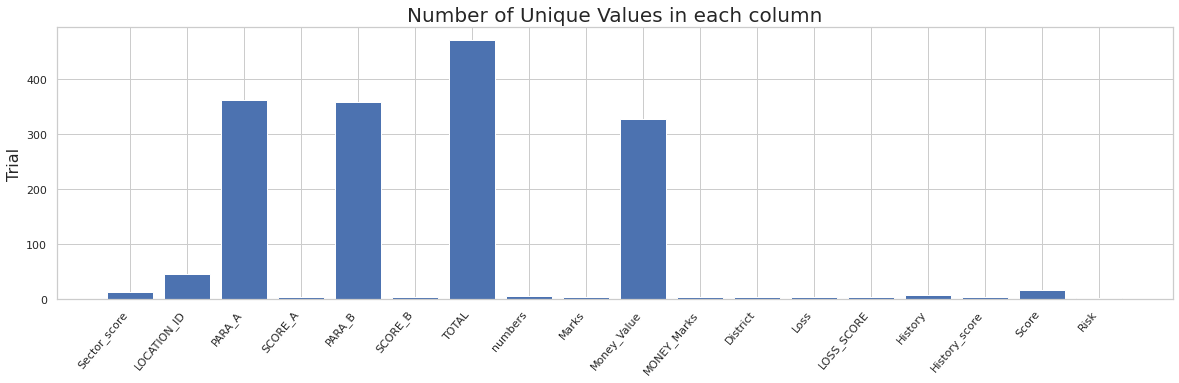

In [ ]:
y_audit_risk=[]
x_audit_risk=[]
for i in range(len(audit_risk.nunique().index)):
    y_audit_risk.append(audit_risk.nunique().index[i])
    x_audit_risk.append(audit_risk.nunique()[i])
    
y_trial=[]
x_trial=[]
for i in range(len(trial.nunique().index)):
    y_trial.append(trial.nunique().index[i])
    x_trial.append(trial.nunique()[i])

plt.figure(figsize=(20,5))

plt.bar(y_audit_risk,x_audit_risk, align='center', alpha=1)
plt.ylabel('Audit_Risk', Fontsize= 16)
plt.title('Number of Unique Values in each column',fontsize=20)
plt.xticks(rotation=50, ha="right")

plt.show()

plt.figure(figsize=(20,5))

plt.bar(y_trial,x_trial, align='center', alpha=1)
plt.ylabel('Trial', Fontsize= 16)
plt.title('Number of Unique Values in each column',fontsize=20)
plt.xticks(rotation=50, ha="right")

plt.show()


In [ ]:
audit_risk.columns & trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score', 'Risk'],
      dtype='object')

In [ ]:
audit_risk[audit_risk.duplicated() == True]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
265,2.72,15,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
474,1.85,16,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
600,55.57,8,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
659,55.57,5,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
679,55.57,9,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
695,55.57,12,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
696,55.57,12,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
704,55.57,8,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
715,55.57,27,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
716,55.57,2,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,...,1.2,0,0.2,0.0,2.4,2.200,1.2,0.5,1.3200,1


In [ ]:
trial[trial.duplicated() == True]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
265,2.72,15,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
474,1.85,16,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
600,55.57,8,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
659,55.57,5,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
679,55.57,9,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
695,55.57,12,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
696,55.57,12,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
704,55.57,8,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
715,55.57,27,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
716,55.57,2,0.00,2,0.0,2,0.00,5.0,2,0.0,2,6,0,2,0,2,2.4,1


**Remove Duplicate Rows** <br>
While training a supervised learning algorithm, the usual assumptions are that:

Data points are independent and identically distributed
Training and testing data is sampled from the same distribution
In light of these assumptions, we are removing duplicate records from both daframes.

In [ ]:
audit_risk=audit_risk.drop_duplicates()
display(audit_risk.shape)
trial=trial.drop_duplicates()
display(trial.shape)

(763, 27)

(763, 18)

<b>Create Unique column to merge two dataframes.</b> <br><br>
Here, We have tried a different combination of common columns of both data frames to create a unique column which gives 763 unique values so we can merge two data frames using that common column.<br>

Finally after some trial and error combination of five columns i.e Money_Value,TOTAL,LOCATION_ID,Sector_score and Score gave us 763 unique values for both columns. so We have created one column each named Merge_audit and Merge_trial in Audit_Risk and Dataframe respectively.

In [ ]:
audit_risk['Merge_audit']= audit_risk['Money_Value'].astype(str) + '-' + audit_risk['TOTAL'].astype(str) + '-' + audit_risk['LOCATION_ID'].astype(str) + '-' + audit_risk['Sector_score'].astype(str) + '-' + audit_risk['Score'].astype(str)
audit_risk['Merge_audit'].nunique()

763

In [ ]:
trial['Merge_trial']= trial['Money_Value'].astype(str) + '-' + trial['TOTAL'].astype(str) + '-' + trial['LOCATION_ID'].astype(str) + '-' + trial['Sector_score'].astype(str) + '-' + trial['Score'].astype(str) 
trial['Merge_trial'].nunique()

763

**Merging dataframes**

In [ ]:
cols_to_use1 = trial.columns & audit_risk.columns
cols_to_use1

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score', 'Risk'],
      dtype='object')

In [ ]:
trl_columns = trial.columns.difference(cols_to_use1)
audit = pd.merge(audit_risk, trial[trl_columns], left_on='Merge_audit', right_on = 'Merge_trial', how='inner')
audit.shape

(763, 37)

In [ ]:
audit.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Merge_audit', 'District',
       'History_score', 'LOSS_SCORE', 'Loss', 'MONEY_Marks', 'Marks',
       'Merge_trial', 'SCORE_A', 'SCORE_B'],
      dtype='object')

We have created Merge_audit and Merge_trial columns just to merge data frames and Detection_Risk has the same value across all observations.

Hence, we are dropping Merge_Audit, Merge_trial, and Detection_Risk.

In [ ]:
audit = audit.drop(['Merge_audit','Merge_trial', 'Detection_Risk'], axis = 1)
audit.shape

(763, 34)

In [ ]:
audit =  audit.drop(['Risk_A','Risk_B','MONEY_Marks','Risk_C','Score_B.1','Risk_F','District','Prob','PROB','Risk_D','SCORE_A','SCORE_B'],axis=1)

In [ ]:
print(audit['LOCATION_ID'].unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']


We can see there are three LOCATION_IDs to those numeric values are not assigned so we are assigning three missing numeric values 10,26 and 45 to those LOCATION_IDs.

In [ ]:
audit['LOCATION_ID']=audit['LOCATION_ID'].replace('LOHARU',10)
audit['LOCATION_ID']=audit['LOCATION_ID'].replace('NUH',26)
audit['LOCATION_ID']=audit['LOCATION_ID'].replace('SAFIDON',45)

audit['LOCATION_ID']=(audit['LOCATION_ID']).astype(float)

**Checking Outliers**

Now, we are looking at the overall distribution of the dataset to get a glimpse of skewness of the data across all columns. we can see there are a significant amount of outliers for columns PARA_B, Money_Value and Inherent_Risk.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

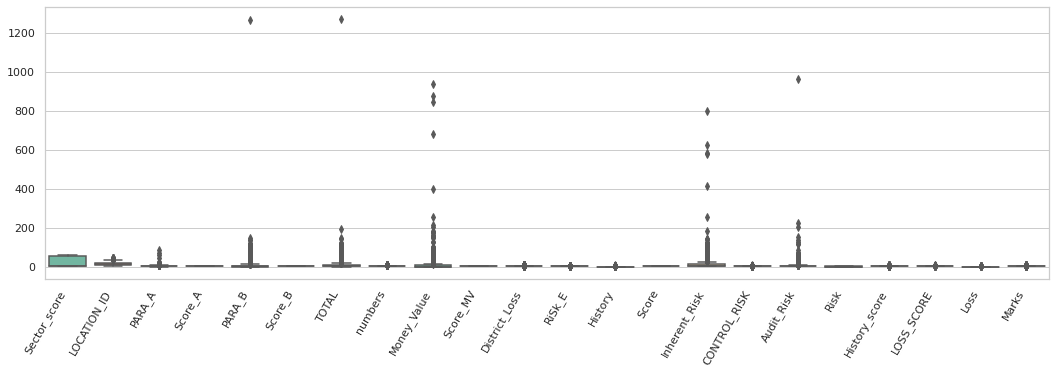

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,5))

sns.set(style="whitegrid")
ax = sns.boxplot(data=audit, orient="v", palette="Set2")
plt.xticks(rotation=60, ha="right")

Now, we are plotting to scatter plot for above-mentioned columns with respect to our target variable Audit_Risk. we can clearly see that there are outliers for those columns. So now we are plotting to scatter plot between these features with respect to our target variable Audit_Risk and we can confirm that there are outliers for those columns.

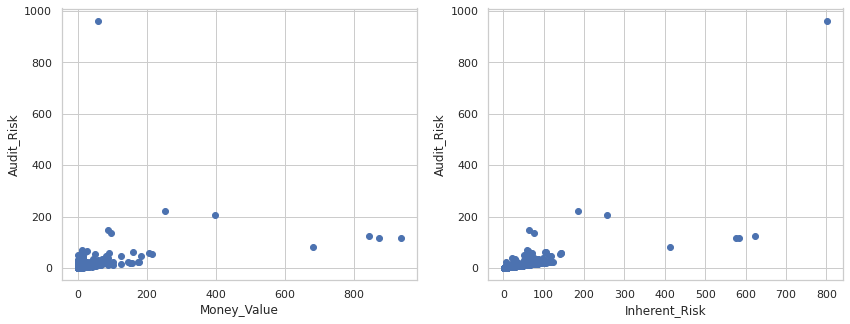

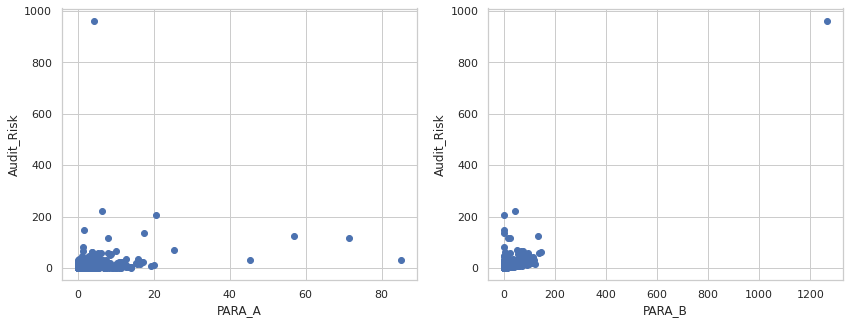

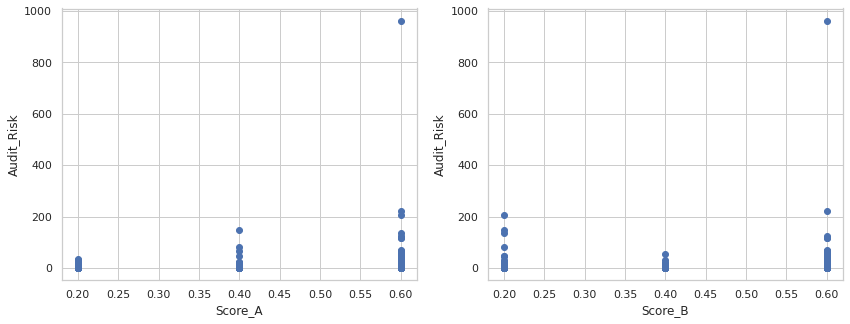

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(audit['Money_Value'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Money_Value')

plt.subplot(1,2,2)
plt.scatter(audit['Inherent_Risk'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Inherent_Risk')
plt.show()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(audit['PARA_A'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('PARA_A')

plt.subplot(1,2,2)
plt.scatter(audit['PARA_B'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('PARA_B')

plt.show()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(audit['Score_A'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Score_A')

plt.subplot(1,2,2)
plt.scatter(audit['Score_B'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Score_B')

plt.show()

**Remove Outliers** <br>
First, we tried to impute outliers with a median value of that particular feature but because of highly skewed nature of the data, the model was not fitting properly to data so we have decided to remove the outlier with an intent that we remove as less data as possible with high accuracy of the models.

So, we tried a different range of outliers and finalized range in such a way that we get rid of around 5 to 6 outliers which we have seen above. We have plotted the above scatter plot again and we confirmed that we were able to remove all those outliers.

In [ ]:
Q1 = audit.quantile(0.25)
Q3 = audit.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
mask = ((audit[['PARA_A', 'Score_A', 'PARA_B', 'Score_B','Inherent_Risk','Money_Value']] < (Q1 - 30 * IQR)) 
        | (audit[['PARA_A', 'Score_A', 'PARA_B', 'Score_B','Inherent_Risk','Money_Value']] > (Q3 + 30 * IQR)))

audit[mask]= np.NaN


In [ ]:
audit.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           2
Score_A          0
PARA_B           3
Score_B          0
TOTAL            0
numbers          0
Money_Value      9
Score_MV         0
District_Loss    0
RiSk_E           0
History          0
Score            0
Inherent_Risk    5
CONTROL_RISK     0
Audit_Risk       0
Risk             0
History_score    0
LOSS_SCORE       0
Loss             0
Marks            0
dtype: int64

In [ ]:
audit = audit.dropna()

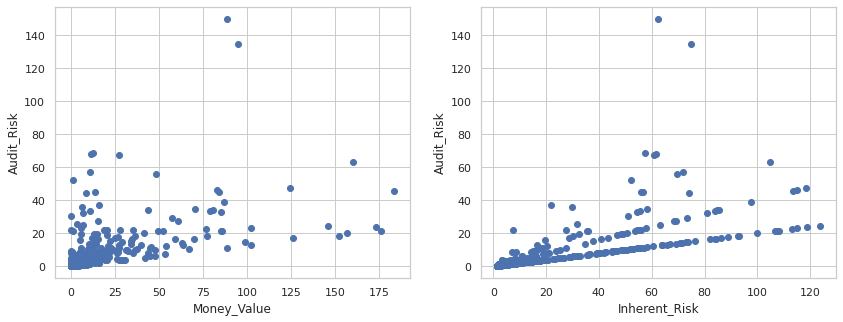

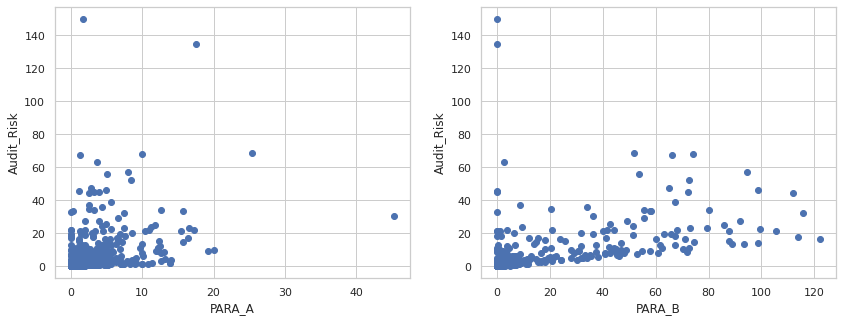

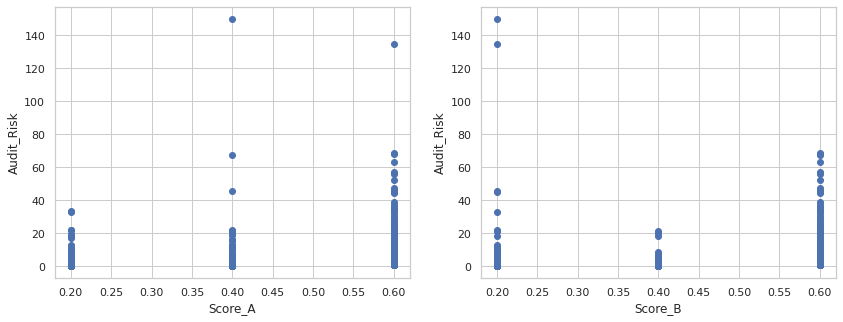

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(audit['Money_Value'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Money_Value')

plt.subplot(1,2,2)
plt.scatter(audit['Inherent_Risk'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Inherent_Risk')
plt.show()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(audit['PARA_A'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('PARA_A')

plt.subplot(1,2,2)
plt.scatter(audit['PARA_B'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('PARA_B')

plt.show()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(audit['Score_A'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Score_A')

plt.subplot(1,2,2)
plt.scatter(audit['Score_B'], audit['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Score_B')

plt.show()


In [ ]:
audit.shape

(750, 22)

### **Regression Task:**

In this section, we will find the best regressor that can be used to predict the variable - 'Audit_Risk' based on the various features present in the dataset.

<b><font color = "red"> KNN Regression

In [ ]:
y = audit['Audit_Risk']

X = audit.drop(['Audit_Risk','Risk'],axis = 1)

In [ ]:
X.shape

(750, 20)

From the shape function on X, we know that the dataframe has **750 data points** and **20 features** that can be used to predict 'Audit_risk' stored in y. <br>

The different regressors that can be used for this task are:<br>

KNN Regressor<br>
Linear Regression<br>
Polynomial Regression<br>
Ridge Regression<br>
Lasso Regression<br>
Support Vector Machine - Linear SVR<br>
Support Vector Machine with Kernel trick – Linear, Rbf, Poly<br><br>
But before we start applying these regressors, we split the dataset into train+validation and testing set.<br> To avoid the danger of overfitting the parameters, we further split the train+validation set to train and validation set i.e. a three-fold split is performed on the entire dataset.

Thus, we fit the above models using train and validation set and after finding the best regressor, we check for the accuracy of the best regressor using testing set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# split dataset into train+validation and test sets
X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X,y, random_state = 3)

# split train+validation set into training and validation sets
X_train_org, X_valid_org, y_train, y_valid = train_test_split(X_trainval_org, y_trainval, random_state=2)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_valid = scaler.transform(X_valid_org)
X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.transform(X_test_org)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 421   size of validation set: 141   size of test set: 188



Let us fit model - KNN Regressor using train and validation set and find the best parameter - 'K' using naive grid search.

To predict a new record, this method relies on finding “similar” records in the training data. These “neighbors” are then used to derive a prediction for the new record by averaging the outcome value of the K-nearest neighbors.

Best parameters: {'K': 2}
Best score: 0.60


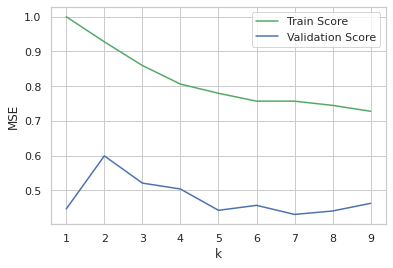

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    score = knn_reg.score(X_valid, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

%matplotlib inline
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best parameters: {}".format(best_parameters))
print("Best score: {:.2f}".format(best_score))

The best parameter value of K for this model is 2 which gives an score of 0.60 on the validation dataset.

We review this parameter using cross validation. In cross validation, the dataset is split into K "folds" of equal size. Each fold acts as the testing set 1 time, and acts as the training set K-1 times. Average testing performance is used as the estimate of the performance.

Usually the k-folds is set as 10.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

knn_grid = KNeighborsRegressor(best_K)
scores = cross_val_score(knn_grid, X_trainval, y_trainval, cv =10, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.7333595  0.17760051 0.98480327 0.50035099 0.7392074  0.7063042
 0.38874504 0.63609985 0.58909295 0.76711008]
Average cross-validation score: 0.62


The average cross-validation score for the parameter K = 2 is 0.62

Let us find the best parameter for this model using GridSearchCV: GridSearchCV allows to define a grid of parameters that will be searched using K-fold cross-validation.

Best parameters: {'n_neighbors': 6}
Average cross-validation score: 0.70


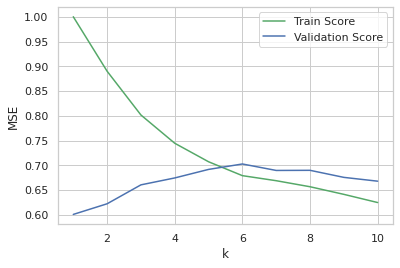

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)

# rebuild a model on the combined training and validation set
grid_search.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best parameters: {}".format(grid_search.best_params_))
print("Average cross-validation score: {:.2f}".format(grid_search.best_score_))

The best parameter for this model using GridSearchCV is 6. Eventhough we found the best parameter as K = 2 using the naive grid search, but with parameter K = 6, the average cross validation is 0.70 which is better than the average cross validation of the naive grid search.

GrisSearchCV gives a better score for KNN regressor compared to naive grid search.

Thus, we will choose the best parameter for KNN regressor as K = 6 because the model might run into overfitting issue for parameter K = 2.


In [ ]:
Regression_Scores={}

Regression_Scores.update({'KNN Regressor':grid_search.best_score_})

In [ ]:
columns = ['Regressor','Average Cross Validation Score', 'Best Parameters']
reg_model_para = pd.DataFrame(columns=columns)

reg_model_para = reg_model_para.append({'Regressor':'KNN Regressor',
                       'Average Cross Validation Score':grid_search.best_score_,
                       'Best Parameters':grid_search.best_params_},ignore_index=True)

<b><font color=red>**Linear Regression**

The most popular model for making predictions is the Linear regression model. This model is used to fit a linear relationship between a numerical outcome variable Y and a set of predictors - X1;X2; : : : ;Xp.

This model does not have any parameters so we directly fit the regression model on the train_validation dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train Score: {:.4f}".format(lreg.score(X_trainval, y_trainval)))

Train Score: 0.0699


As we had seen in the Feature Distribution section, the relationship between a few predictors and the outcome variable was non-linear. Because of this non-linear relationship between the target variable and the predictors, Linear Regression would not be an apt model for prediction of this dataset.

However, let us check the average cross validation for this model:

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
lreg_cv = LinearRegression()
scores = cross_val_score(lreg_cv, X_trainval, y_trainval, cv = kfold)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Regression_Scores.update({'Linear Regression': scores.mean()})

Cross-validation scores: [0.88064379 0.75084371 0.43828982 0.80819194 0.83447771 0.64373207
 0.701815   0.79445356 0.79211413 0.49944364]
Average cross-validation score: 0.71


Cross-validation scores: [0.88064379 0.75084371 0.43828982 0.80819194 0.83447771 0.64373207
 0.701815   0.79445356 0.79211413 0.49944364] <br>
Average cross-validation score: 0.71 <br><br>
The average cross validation score for this model is 0.71 which is better than the results we got by running KNN Regressor. However, it might not be the best regressor model because of the non-linear relationship between the target variable and the predictors.

Also, as there are no parameters in Linear regression, Grid Search is not required.



In [ ]:
reg_model_para = reg_model_para.append({'Regressor':'Linear Regression',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters': ' '},ignore_index=True)

<b><font color=red> **Polynomial Regression**

Best parameters: {'N': 2}
Best score: 0.98


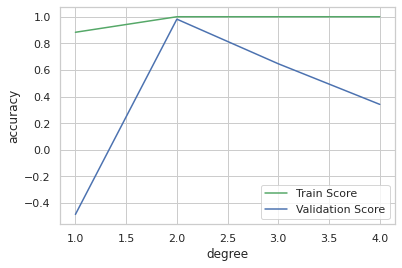

In [ ]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
valid_score_list = []

best_score = 0

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    score = lreg.score(X_valid_poly, y_valid)
    valid_score_list.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'N': n}
            best_N = n

%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_list, c = 'b', label = 'Validation Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

print("Best parameters: {}".format(best_parameters))
print("Best score: {:.2f}".format(best_score))


In [ ]:
poly_grid = PolynomialFeatures(best_N)

X_trainval_poly = poly_grid.fit_transform(X_trainval)

scores = cross_val_score(LinearRegression(), X_trainval_poly, y_trainval, cv = kfold, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.99999997 0.99904406 0.99997365 0.98830637 0.99901648 0.93302009
 0.95103198 1.         0.93313198 0.95879597]
Average cross-validation score: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 3

Best cross-validation score: 0.97


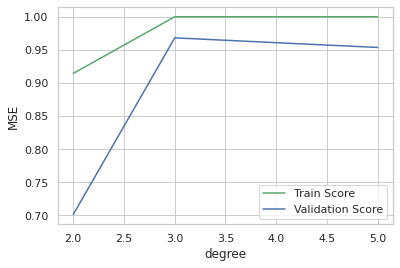

In [ ]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(5)}

grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
x_axis = range(1,6)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
Regression_Scores.update({'Polynomial Regression':scores.mean()})
reg_model_para = reg_model_para.append({'Regressor':'Polynomial Regression',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':best_parameters},ignore_index=True)

<b><font color=red> **Ridge Regression**

Ridge regression is an extension for linear regression. It's basically a regularized linear regression model. It reduces the model complexity by coefficient shrinkage. It shrinks the parameters, therefore it is mostly used to prevent multicollinearity. It uses L2 regularization technique.

We control the penalty term by changing the values of alpha. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced.

Also, as there is a non-linear relationship between the variables. So, we fit the train and validation set using PolynomialFeatures and apply Ridge Regression instead of Linear Regression on the fitted data. We will consider degree for PolynomialFeatures to be 2 as it is the best parameter for Polynomial Regression model.

Best parameters: {'alpha': 0.001}
Best score: 0.90


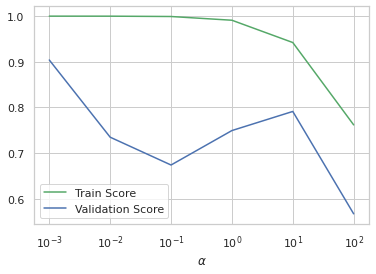

In [ ]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
valid_score_list = []

X_trainval_poly = poly_grid.fit_transform(X_trainval)
X_train_poly = poly_grid.fit_transform(X_train)
X_valid_poly = poly_grid.transform(X_valid)
X_test_poly = poly_grid.transform(X_test)

best_score = 0

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_poly,y_train)
    train_score_list.append(ridge.score(X_train_poly,y_train))
    score = ridge.score(X_valid_poly, y_valid)
    valid_score_list.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            best_Alpha = alpha
            
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

print("Best parameters: {}".format(best_parameters))
print("Best score: {:.2f}".format(best_score))

Best parameters: {'alpha': 0.001}
Best score: 0.90


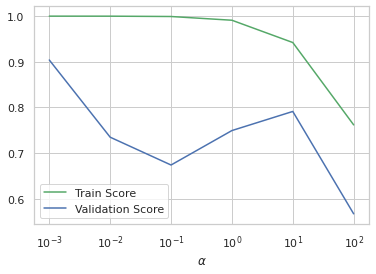

In [ ]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
valid_score_list = []

X_trainval_poly = poly_grid.fit_transform(X_trainval)
X_train_poly = poly_grid.fit_transform(X_train)
X_valid_poly = poly_grid.transform(X_valid)
X_test_poly = poly_grid.transform(X_test)

best_score = 0

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_poly,y_train)
    train_score_list.append(ridge.score(X_train_poly,y_train))
    score = ridge.score(X_valid_poly, y_valid)
    valid_score_list.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            best_Alpha = alpha
            
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

print("Best parameters: {}".format(best_parameters))
print("Best score: {:.2f}".format(best_score))

The best parameter value of alpha for this model is 0.001 giving a score of 0.90 on the validation dataset. Let's check the parameter tuning using cross validation score.

In [ ]:
ridge_grid = Ridge(best_Alpha)

scores = cross_val_score(ridge_grid, X_trainval_poly, y_trainval, cv = 10, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.99891997 0.99849146 0.98985891 0.98178306 0.99941109 0.97204198
 0.91203893 0.99986979 0.86773309 0.928542  ]
Average cross-validation score: 0.96


Applying this regularization technique on the train+validation set using the value of alpha = 0.001 found using naive grid search gives an average cross-validation score of 0.96.

Let's check for the best parameter value of alpha using GridSearchCV.

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.95


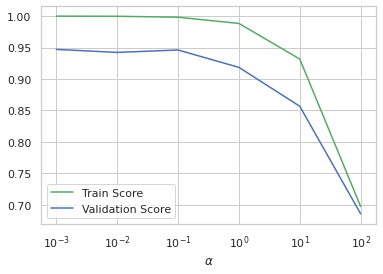

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_trainval_poly, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

From the graph, we can see that the score for alpha = 0.001 and 0.1 is almost same which is 0.95. With the increasing values of alpha, regularization parameter increases causing a reduction in the magnitude of coefficients. This caused the training and validation score to drop.

Thus, increasing the value of alpha, in this case, lead to underfit the model.

In [ ]:
Regression_Scores.update({'Ridge Regression': scores.mean()})

In [ ]:
reg_model_para = reg_model_para.append({'Regressor':'Ridge Regression',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':best_parameters},ignore_index=True)

<b><font color=red>**Lasso Regression**

Lasso regression is another shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model.

This penalty in the model is added by changing the value of alpha.

Also, as done in Ridge regression, we fit the train and validation set using PolynomialFeatures and apply Lasso Regression instead of Linear Regression on the fitted data. We will consider degree for PolynomialFeatures to be 2 as it is the best parameter for Polynomial Regression model.

Best score: 1.00
Best parameters: {'alpha': 0.001}


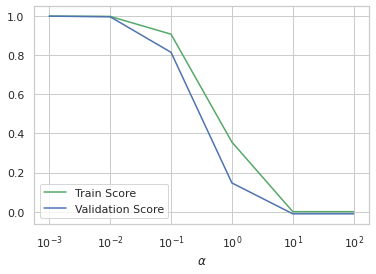

In [ ]:
from sklearn.linear_model import Lasso

x_range = [0.001, 0.01, 0.1, 1, 10, 100]

train_score_list = []
valid_score_list = []

best_score = 0 

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter=100000)
    lasso.fit(X_train_poly,y_train)
    train_score_list.append(lasso.score(X_train_poly,y_train))
    score = lasso.score(X_valid_poly, y_valid)
    valid_score_list.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            best_Alpha = alpha
            
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of alpha for this model is 0.001 giving a perfect score of 1.00 on the validation dataset. Let's check if we get the same result for this parameter using cross validation score.

In [ ]:
lasso_grid = Lasso(best_Alpha, max_iter=100000)
scores = cross_val_score(lasso_grid, X_trainval_poly, y_trainval, cv = 10, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.99942323 0.99988636 0.99981836 0.99521738 0.99909456 0.94186789
 0.97496926 0.99992305 0.99833584 0.99692344]
Average cross-validation score: 0.99


We are able to achieve an score of 0.99 using cross validation score.

Thus, we can say that our model is doing good in identifying Audit_risk on the validation dataset. Let's check if we can get a more efficient cross-validation score using GridSearchCV.

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.99


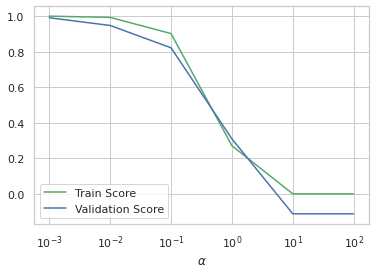

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(max_iter = 100000), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval_poly, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Even GridSearchCV gave the same alpha value as the best parameter with a score of 0.99.

Also, from the graph we see that with the increase in the value of alpha, the training and validation score becomes 0. This shows that this model has penalized the magnitude of the coefficients to 0 for higher values of alph

In [ ]:
Regression_Scores.update({'Lasso Regression':grid_search.best_score_})


In [ ]:
reg_model_para = reg_model_para.append({'Regressor':'Lasso Regression',
                       'Average Cross Validation Score':grid_search.best_score_,
                       'Best Parameters':grid_search.best_params_},ignore_index=True)

<b><font color=red>**SVM with Kernel Trick**

<b>SVM with kernel trick</b><br><br>
Kernel trick is a way to make optimization efficient when there are features having a linear or non linear decision boundary. Using the kernel trick, we find a higher dimensional space in which these points(linear or non-linear) were linearly separable; Map the original features to this higher transformer space; Obtain a set of weights corresponding to the decision boundary hyperplane; Map this hyperplane back into the original 2D space to obtain a linear/non-linear decision boundary.

In another way, kernel is a way to change the relative dimensions of the data points. It's possible to create a very complex decision boundary based on a high dimensional feature mapping because of the kernel representation.

<b>SVM - rbf(Radial Basis Function)</b><br><br>
The parameters that effect this model are parameters gamma and C.

Parameter C behaves as the regularization parameter. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or "shape" of the data.

In [ ]:
from sklearn.svm import SVR

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svr_rbf = SVR(kernel='rbf', gamma=gamma, C=C)
        svr_rbf.fit(X_train,y_train)
        train_score_list.append(svr_rbf.score(X_train,y_train))
        score = svr_rbf.score(X_valid, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.65
Best parameters: {'gamma': 0.1, 'C': 100}


The best paramaters for this kernel are gamma = 0.1 and C = 100 which gives a score of 0.65 on the validation set.

The average cross-validation score for these parameters is:

In [ ]:
svr_rbf_grid = SVR(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svr_rbf_grid, X_trainval, y_trainval, cv = 10, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.95028014 0.97814188 0.94131845 0.92768304 0.94773525 0.88977047
 0.59650107 0.99684185 0.88086693 0.87799994]
Average cross-validation score: 0.90


In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.90


From the results of both the grid search methods - naive grid search and GridSearchCV, we get the same average cross-validation score for the best regularization parameter C = 100 and gamma = 0.1

In [ ]:
Regression_Scores.update({'SVM RBF Kernel':scores.mean()})

In [ ]:
reg_model_para = reg_model_para.append({'Regressor':'SVM RBF Kernel',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':best_parameters},ignore_index=True)

<b>SVM - Poly</b><br><br>
Apart from gamma and regularization parameter C, this model takes into account another parameter degree which defines the non-linear relationship between the features and the target variable.

In [ ]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svr_poly = SVR(kernel='poly', degree = degree, C=C, gamma = 'auto')
        svr_poly.fit(X_train,y_train)
        train_score_list.append(svr_poly.score(X_train,y_train))
        score = svr_poly.score(X_valid, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'degree': degree , 'C' : C}
            best_Degree = degree
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.66
Best parameters: {'degree': 2, 'C': 100}


The best parameters for this model are Degree = 2 and C = 100 giving a validation score of 0.66.

Checking the average cross-validation score:

In [ ]:
svr_poly_grid = SVR(kernel='poly',degree = best_Degree, C=best_C, gamma = 'auto')

scores = cross_val_score(svr_poly_grid, X_trainval, y_trainval, cv = 10, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.83990545 0.95554967 0.85246861 0.81775571 0.81476109 0.71127539
 0.47644656 0.95413367 0.79991031 0.8840575 ]
Average cross-validation score: 0.81


In [ ]:
param_grid = {'degree': [1,2,3,4,5],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel='poly', gamma = 'auto'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 2}
Best cross-validation score: 0.81


From the results of naive grid search and GridSearchCV, it can be said that the best parameters for this model are C = 100 and degree = 2.

In [ ]:
Regression_Scores.update({'SVM Poly Kernel':scores.mean()})

In [ ]:
reg_model_para = reg_model_para.append({'Regressor':'SVM Poly Kernel',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':best_parameters},ignore_index=True)

<b><font color='blue'>Best Regressor Model and Prediction:</b></font><br><br>
Every model has a score method provided as default evaluation criterion for the problem they are designed to solve. However, we have used average cross-validation score with scoring paramater as r2 (R-Square) for the best parameter of that regressor.

Comparing the average cross-validation score for all the above regressor:

In [ ]:
reg_model_para

,Regressor,Average Cross Validation Score,Best Parameters
0,KNN Regressor,0.702636,{'n_neighbors': 6}
1,Linear Regression,0.714401,
2,Polynomial Regression,0.976232,{'N': 2}
3,Ridge Regression,0.964869,{'alpha': 0.001}
4,Lasso Regression,0.990546,{'alpha': 0.001}
5,SVM RBF Kernel,0.898714,"{'gamma': 0.1, 'C': 100}"
6,SVM Poly Kernel,0.810626,"{'degree': 2, 'C': 100}"


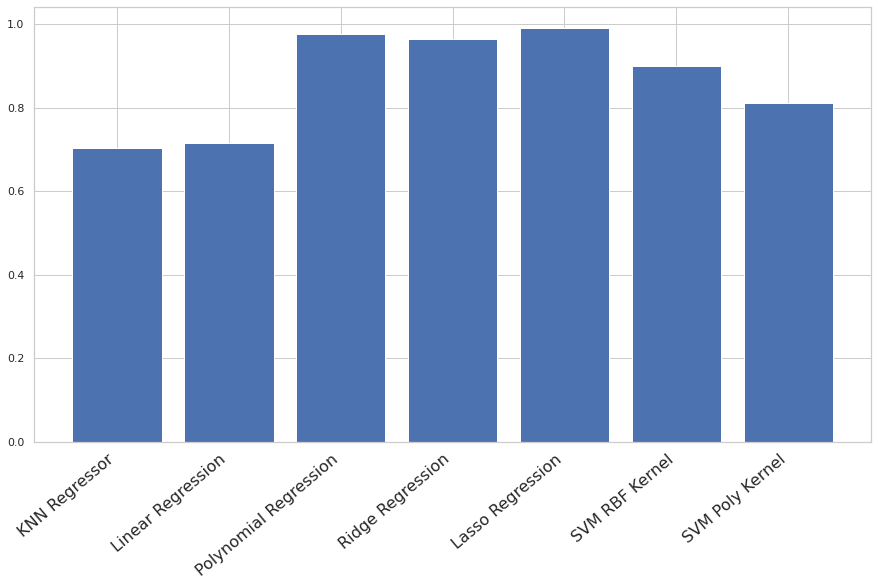

In [ ]:
plt.figure(figsize=(15,8))

plt.bar(range(len(Regression_Scores)), list(Regression_Scores.values()), align='center')
plt.xticks(range(len(Regression_Scores)), list(Regression_Scores.keys()))

plt.xticks(rotation=40, ha="right", fontsize=16)
plt.show()

**CLASSIFICATION TASKS**

In [ ]:
y = audit['Risk']

X = audit.drop(['Audit_Risk','Risk'],axis = 1)
X.shape

(750, 20)

From the shape function on X, we know that the dataframe has 750 data points and 20 features that can be used to predict 'Risk' stored in y.

The different classification models that can be used for this task are:

KNN Classification
Logistic Regression
Support Vector Machine - Linear SVC
Support Vector Machine with Kernel trick – Rbf, Poly
Decision Tree
But before we start applying these classification models, a three-fold split is performed on the entire dataset, the same way as done for Regression task.

Thus, we fit the above models using train and validation set and after finding the best classifier, we check for the accuracy of the best classifier using test set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X,y, random_state = 2)

# split train+validation set into training and validation sets
X_train_org, X_valid_org, y_train, y_valid = train_test_split(X_trainval_org, y_trainval, random_state=1)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_valid = scaler.fit_transform(X_valid_org)
X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.transform(X_test_org)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 421   size of validation set: 141   size of test set: 188



<b><font color=red>**KNN Classification**

The idea in k-nearest-neighbors methods is to identify k records in the training dataset that are similar to a new record that we wish to classify. We then use these similar (neighboring) records to classify the new record into a class, assigning the new record to the predominant class among these neighbors.

Best score: 0.94
Best parameters: {'K': 3}


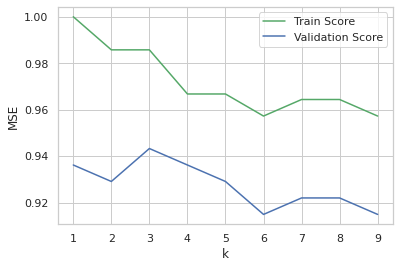

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    train_score_array.append(knn_clf.score(X_train, y_train))
    score = knn_clf.score(X_valid, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of K for this model is 3 which gives an accuracy of 0.94 on the validation dataset.

We review this parameter using cross validation:

In [ ]:
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98245614 1.         0.92857143 0.98214286 0.94642857 0.94642857
 0.98214286 0.92857143 0.96428571 0.96428571]
Average cross-validation score: 0.96


The average cross-validation score for the parameter K = 3 is 0.96

Let us find the best parameter for this model using GridSearchCV:

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.97


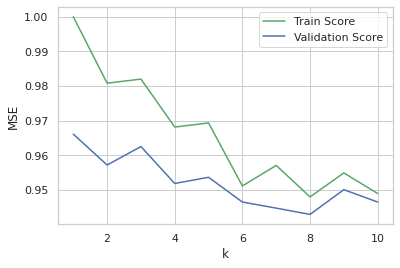

In [ ]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


The best parameter for this model using GridSearchCV is 1. Eventhough we found the best parameter as K = 3 using the naive grid search, but with parameter K = 1, the average cross validation is 0.97 which is better than the average cross validation of the naive grid search.

But we know that for parameter K = 1 in KNN-Classifier, the model is overfitted eventhough it is giving a good average cross-validation score.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics
 
pred_knn = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_knn))

0.9840425531914894
Confusion matrix:
[[118   0]
 [  3  67]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.96      0.98        70

    accuracy                           0.98       188
   macro avg       0.99      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[1]))

Recall    : 0.9571428571428572


Thus, the accuracy and recall of this model for the best parameter - K are 0.984 and 0.957.



In [ ]:
Classification_Scores={}

Classification_Scores.update({'KNN Classification':[metrics.accuracy_score(y_test,pred_knn),recall[1]]})

In [ ]:
columns = ['Classifier','Best Parameters','Accuracy_Score','Recall of 1']
clf_model_para = pd.DataFrame(columns=columns)

clf_model_para=clf_model_para.append({'Classifier':'KNN Classification',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_knn),
                                      'Recall of 1':recall[1]},ignore_index=True)

<b><font color=red>**Logistic Regression**

Best score: 0.98
Best parameters: {'C': 100, 'penalty': 'l1'}


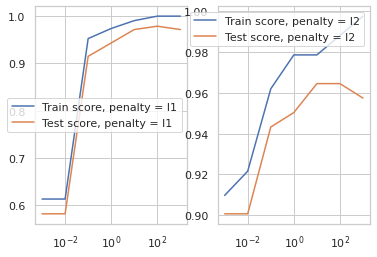

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver='liblinear')
    
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    
    score = log_l1.score(X_valid, y_valid)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_valid, y_valid)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C, solver='liblinear')

scores = cross_val_score(log_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         0.98214286 0.96428571 0.96428571 0.98214286
 1.         1.         0.98214286 1.        ]
Average cross-validation score: 0.99


In [ ]:
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100],
              'solver':['liblinear']}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.99


In [ ]:
pred_log = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_log))

0.9946808510638298
Confusion matrix:
[[118   0]
 [  1  69]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       1.00      0.99      0.99        70

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[1]))

Recall    : 0.9857142857142858


In [ ]:
Classification_Scores.update({'Logistic Classification':[metrics.accuracy_score(y_test,pred_log),recall[1]]})
clf_model_para=clf_model_para.append({'Classifier':'Logistic Classification',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_log),
                                      'Recall of 1':recall[1]},ignore_index=True)

<b><font color=red>**SVM - Linear SVC**

Best score: 0.96
Best parameters: {'C': 1}


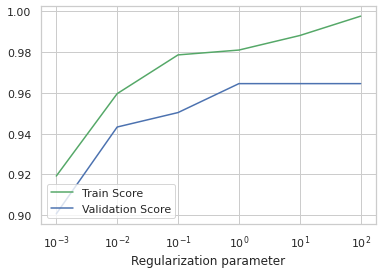

In [ ]:
from sklearn.svm import LinearSVC

train_score_list = []
valid_score_list = []

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    linear_svc = LinearSVC(C=C, max_iter=10000)
    linear_svc.fit(X_train,y_train)
    train_score_list.append(linear_svc.score(X_train,y_train))
    score = linear_svc.score(X_valid, y_valid)
    valid_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
        best_C = C

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization parameter')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
linear_svc_grid = LinearSVC(C = best_C, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_trainval, y_trainval, cv = 10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96491228 0.98245614 0.94642857 0.98214286 0.94642857 0.98214286
 0.98214286 0.98214286 0.96428571 1.        ]
Average cross-validation score: 0.97


Best parameters: {'C': 100}
Best cross-validation score: 0.98


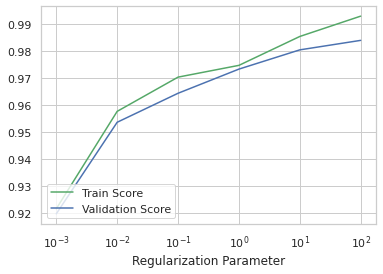

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
pred_linear_svc = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_linear_svc))

0.9893617021276596
Confusion matrix:
[[118   0]
 [  2  68]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.97      0.99        70

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[1]))

Recall    : 0.9714285714285714


In [ ]:
Classification_Scores.update({'Linear_SVC':[metrics.accuracy_score(y_test,pred_linear_svc),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Linear_SVC',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_linear_svc),
                                      'Recall of 1':recall[1]},ignore_index=True)

<b><font color=red>**SVM - RBF**

In [ ]:
from sklearn.svm import SVC

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        score = svc_rbf.score(X_valid, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.96
Best parameters: {'gamma': 0.01, 'C': 100}


In [ ]:
svc_rbf_grid = SVC(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svc_rbf_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98245614 1.         0.92857143 0.96428571 0.94642857 0.96428571
 0.96428571 0.96428571 0.96428571 1.        ]
Average cross-validation score: 0.97


In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.98


In [ ]:
pred_rbf = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_rbf))

0.9787234042553191
Confusion matrix:
[[117   1]
 [  3  67]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.99      0.96      0.97        70

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[1]))

Recall    : 0.9571428571428572


In [ ]:
Classification_Scores.update({'SVC RBF Kernel':[metrics.accuracy_score(y_test,pred_rbf),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'SVC RBF Kernel',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_rbf),
                                      'Recall of 1':recall[1]},ignore_index=True)

<b><font color=red>**SVM - Poly**

In [ ]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.98
Best parameters: {'degree': 1, 'C': 10, 'gamma': 100}


In [ ]:
svc_poly_grid = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = best_Gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98245614 0.96491228 0.94642857 0.92857143 0.94642857 0.94642857
 0.98214286 0.96428571 0.96428571 1.        ]
Average cross-validation score: 0.96


In [ ]:
pred_poly = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_poly))

0.9787234042553191
Confusion matrix:
[[117   1]
 [  3  67]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.99      0.96      0.97        70

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[1]))

Recall    : 0.9571428571428572


In [ ]:
Classification_Scores.update({'SVC Poly Kernel':[metrics.accuracy_score(y_test,pred_poly),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'SVC Poly Kernel',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_poly),
                                      'Recall of 1':recall[1]},ignore_index=True)

<b><font color=red>**Decision Tree**

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


As we have not mentioned any max_depth in our classifier, nodes are expanded until all leaves are pure because of which we are getting an accuracy of 1.00 on the training set. We are also getting an accuracy of 1 on the testing set.

Let us check for the average cross-validation score for this model using cross_val_score.



In [ ]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         0.98214286 1.         0.98214286 1.
 1.         1.         1.         1.        ]
Average cross-validation score: 1.00


The average cross-validation score for this model is 0.99. As there are no parameters in this model, Grid-Search is not required to be performed.



In [ ]:
pred_tree = dtree.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_tree))

1.0
Confusion matrix:
[[118   0]
 [  0  70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        70

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[1]))

Recall    : 1.0


Thus, the accuracy and recall of this model are 1.00 and 1.00 respectively.



In [ ]:
Classification_Scores.update({'Decison Tree':[metrics.accuracy_score(y_test,pred_tree),recall[1]]})


In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Decision Tree',
                                      'Best Parameters':' ',
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_tree),
                                      'Recall of 1':recall[1]},ignore_index=True)

<h1> <font color='blue'><b>Best Classifier

Let's check for the accuracy score and recall for all the above model:

In [ ]:
clf_model_para

,Classifier,Best Parameters,Accuracy_Score,Recall of 1
0,KNN Classification,{'n_neighbors': 1},0.984043,0.957143
1,Logistic Classification,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.994681,0.985714
2,Linear_SVC,{'C': 100},0.989362,0.971429
3,SVC RBF Kernel,"{'C': 100, 'gamma': 0.1}",0.978723,0.957143
4,SVC Poly Kernel,"{'C': 100, 'gamma': 0.1}",0.978723,0.957143
5,Decision Tree,,1.000000,1.000000


In [ ]:
Classification_Scores=pd.DataFrame(Classification_Scores)
Classification_Scores.rename({0:'Accuracy_Score',1:'Recall'})

,KNN Classification,Logistic Classification,Linear_SVC,SVC RBF Kernel,SVC Poly Kernel,Decison Tree
Accuracy_Score,0.984043,0.994681,0.989362,0.978723,0.978723,1.0
Recall,0.957143,0.985714,0.971429,0.957143,0.957143,1.0


<Figure size 4032x360 with 0 Axes>

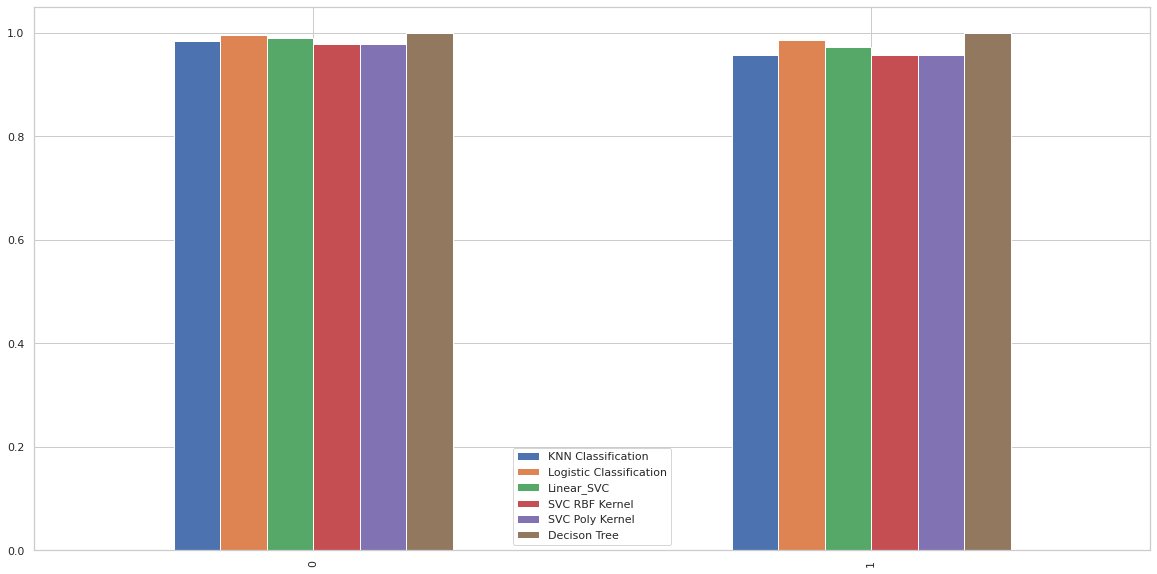

In [ ]:
plt.figure(figsize=(56,5))

Classification_Scores.plot.bar(figsize=(20,10))

Our evaluation strategy is based on the having best accuracy and best recall value(as we do not wish to misclassify the firms that are fraudulent but classified as not fraudulent i.e. have less false negatives in our confusion matrix)

From the above graph, it can be said that we are getting an accuracy of 1 and recall score of 1 for two models:

SVM - Poly<br>
Decision Tree<br><br>
Thus, any of the above two classifiers can be used as a classifier for predicting the class of Risk.

The biggest difference between the two algorithms is that SVM - Poly uses the kernel trick to turn a linearly nonseparable problem into a linearly separable one, while decision trees split the input space into hyper-rectangles according to the target.

However, for classification problem, Decision Tree is more preffered over SVM - Poly as it is non-parametric, makes no assumption on the distribution of data and the structure of the true model. They require less data cleaning and are not influenced by outliers and multicollinearity to some fair extent.